<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularização

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/cars-uci-linked.csv')
df=df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


In [0]:
def standard(s):
    m=s.mean()
    d=s.std()
    s=(s-m)/d
    return (s)

In [0]:
df['hps']=standard(df['horsepower'])

In [52]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hps
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,0.663285
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,1.572585
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,1.182885
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,1.182885
4,17.0,8,3020,140.0,3449,105,70,1,ford torino,0.923085


Escrever as funções Erro médio quadrático e o respectivo gradiente (já fizemos isso em outra aula...)

In [0]:
#complete o código
def grademq(X,theta,y):
    return (1/len(y)) * (np.dot(X.T, np.dot(X, theta) - y))

In [0]:
#complete o código
def emq(ye,y):
    dif = ye - y
    return (1 / len(y)) * np.inner(dif, dif)
    

In [0]:
Crie as matrizes X e y com potência com expoente 1 a 7

In [56]:
X = np.ones((len(df), 8))
for i in range(1, 8):
  X[:, i] = df['hps'] ** i

y = np.array(df['mpg'])
X[:2]

array([[ 1.        ,  0.66328508,  0.4399471 ,  0.29181035,  0.19355345,
         0.12838112,  0.08515328,  0.0564809 ],
       [ 1.        ,  1.57258478,  2.47302289,  3.88903815,  6.1158422 ,
         9.61768036, 15.12461775, 23.78474366]])

Faça Gradient descent até boa convergência (?). Registre o EMQ a cada iteração 

In [61]:
theta = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
errorList = []
yEstimate = np.dot(X, theta)

errorList.append(emq(yEstimate, y))

for i in range(50000):
  g = grademq(X, theta, y)
  theta = theta - 0.00001 * g
  yEstimate = np.dot(X, theta)
  errorList.append(emq(yEstimate, y))

theta, errorList[-10:]


(array([ 7.91941078, -2.02980169,  3.81681903, -1.09123422,  2.56834392,
        -1.92323118,  0.40616424, -0.0144262 ]),
 [172.90274939036846,
  172.8999266037186,
  172.89710388482266,
  172.8942812336784,
  172.8914586502836,
  172.888636134636,
  172.8858136867334,
  172.88299130657353,
  172.88016899415425,
  172.87734674947316])

Apresente os thetas e o gráfico do erro médio quadrático

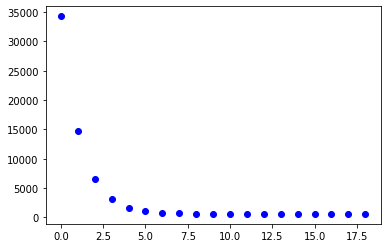

In [63]:
plt.plot(errorList[1:20], 'bo')
plt.show()

Apresente o gráfico com emq ao longo das iterações

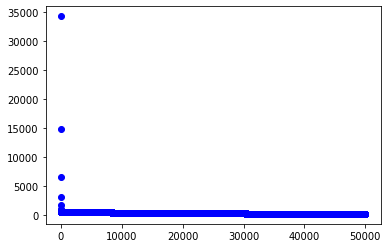

In [64]:
plt.plot(errorList[1:],'bo')
plt.show()

Apresente a predição para todo o dataset sem regularização (gráfico)

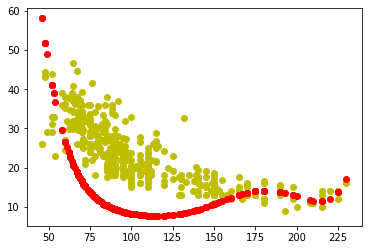

In [66]:

plt.plot(df['horsepower'],df['mpg'],'yo')
plt.plot(df['horsepower'],yEstimate,'ro')
plt.show()

Incluir Regularização em uma nova função gradiente

In [0]:
def grademqr(X,theta,y,lamb):
    reg = lamb * theta
    reg[0] = 0.0
    return (1/len(y))*(np.dot(X.T,np.dot(X,theta)-y)+reg)

Refazer gradient descent com gradiente regularizado 

In [77]:
thetaAux = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
errorListAux = []
yEstimateAux = np.dot(X, theta)

errorListAux.append(emq(yEstimateAux, y))

for i in range(50000):
  g = grademqr(X, thetaAux, y, 100)
  thetaAux = thetaAux - 0.00001 * g
  yEstimateAux = np.dot(X, thetaAux)
  errorListAux.append(emq(yEstimateAux, y))

thetaAux, theta, errorListAux[-10:]

(array([ 7.96428616, -1.93709865,  3.57264914, -1.06067515,  2.42153199,
        -1.85049249,  0.42980635, -0.02427396]),
 array([ 7.91941078, -2.02980169,  3.81681903, -1.09123422,  2.56834392,
        -1.92323118,  0.40616424, -0.0144262 ]),
 [174.96120460071205,
  174.95838051013695,
  174.95555648684083,
  174.95273253082138,
  174.94990864207654,
  174.94708482060418,
  174.94426106640182,
  174.9414373794675,
  174.93861375979884,
  174.93579020739364])

Apresente o gráfico das predições com regularização

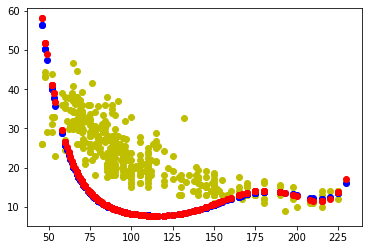

In [79]:
yEstimateAux = np.dot(X, thetaAux)
plt.plot(df['horsepower'], df['mpg'], 'yo')
plt.plot(df['horsepower'], yEstimateAux, 'bo')
plt.plot(df['horsepower'], yEstimate, 'ro')
plt.show()

Compare thetas (com e sem regularização)

In [81]:
theta,thetaAux

(array([ 7.91941078, -2.02980169,  3.81681903, -1.09123422,  2.56834392,
        -1.92323118,  0.40616424, -0.0144262 ]),
 array([ 7.96428616, -1.93709865,  3.57264914, -1.06067515,  2.42153199,
        -1.85049249,  0.42980635, -0.02427396]))

Compare pos erros médios quadráticos finais (sem penalização). Explique'

In [83]:
errorList[-1],errorListAux[-1]

(172.87734674947316, 174.93579020739364)